# Exercise 1

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters)

# Import MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784', version=1)

In [7]:
data['data'].iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
data['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

# store the features values to X and the labels to y

In [8]:
X, y = data['data'], data['target']

# Convert y values from string to int

In [23]:
import numpy as np

y = y.astype(np.uint8)

In [9]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

# display a image

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

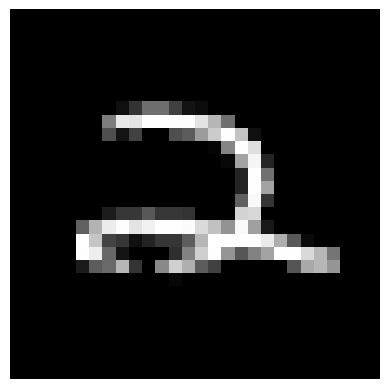

In [24]:
import matplotlib.pyplot as plt
import random

random_image = X.iloc[random.randint(0, len(X))].values.reshape(28, 28)

plt.imshow(random_image, cmap='grey')
plt.axis('off')

# create the dataset

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
58774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_train

58774    3
7414     2
63662    8
54551    2
50995    3
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: class, Length: 52500, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

# Import KNN model and Grid Search

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create an instance of KNN model
knn = KNeighborsClassifier()

params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance']
}

# grid search using k-fold validation (k = 5)
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')

# fit
grid_search.fit(X_train, y_train)

# best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# best score
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9713333333333333


In [31]:
from sklearn.metrics import accuracy_score

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

# accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

KNN Accuracy: 0.97
